<img src='New_York_Times_logo_variation.jpg'>
<img src='NYT_WordCloud.jpg'>

In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df1 = pd.read_csv("/Users/Yemre/Desktop/CapStone/NYT_Articles_.csv")
df2 = pd.read_csv("/Users/Yemre/Desktop/NYT_Article_Collections/New_Times_Last_SON_aprl_3.csv")
df3 = pd.read_csv("/Users/Yemre/Desktop/NYT_Article_Collections/New_Times_Last_SON_aprl_3_2nd.csv")
df4 = pd.read_csv("/Users/Yemre/Desktop/NYT_Article_Collections/New_Times_Last_SON_aprl_4.csv")

In [3]:
df_all = pd.concat([df1,df2,df3,df4],axis=0,ignore_index=True).reset_index()

In [4]:
# Freeing some space
del df1,df2,df3,df4

In [5]:
# Number of articles in each section
df_all.section_name.value_counts()

Counter({'Arts': 816,
         'Automobiles': 9,
         'Books': 163,
         'Briefing': 90,
         'Business Day': 2222,
         'Climate': 11,
         'Corrections': 23,
         'Crosswords & Games': 51,
         'Fashion & Style': 196,
         'Food': 111,
         'Health': 78,
         'Job Market': 6,
         'Magazine': 30,
         'Movies': 172,
         'N.Y. / Region': 267,
         'NYT Now': 16,
         'Opinion': 612,
         'Podcasts': 9,
         'Public Editor': 6,
         'Real Estate': 91,
         'Science': 80,
         'Sports': 2982,
         'Style': 30,
         'Sunday Review': 3,
         'T Magazine': 42,
         'Technology': 292,
         'The Learning Network': 54,
         'The Upshot': 32,
         'Theater': 103,
         'Times Insider': 71,
         'Today\x92s Paper': 6,
         'Today\xe2\x80\x99s Paper': 16,
         'Travel': 26,
         'U.S.': 5647,
         'Universal': 1,
         'Well': 38,
         'World': 4566,
        

In [6]:
# Getting only wanted sections
df_all = df_all[(df_all.section_name == 'World') | (df_all.section_name == 'U.S.') | (df_all.section_name == 'Business Day')]

In [7]:
df_all.shape

(12435, 23)

In [8]:
for idx, item in enumerate(df_all.body):
    df_all.body[idx] = re.sub('[^\x00-\x7F]+', "", item)
    if idx%500 == 0:
        print 'Here is the ',idx,'th item'

Here is the  0 th item
Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6000 th item
Here is the  6500 th item
Here is the  7000 th item
Here is the  7500 th item
Here is the  8000 th item
Here is the  8500 th item
Here is the  9000 th item
Here is the  9500 th item
Here is the  10000 th item
Here is the  10500 th item
Here is the  11000 th item
Here is the  11500 th item
Here is the  12000 th item


In [212]:
for idx,item in enumerate(df_all.head_clean):
    df_all.head_clean[idx] = re.sub('[^\x00-\x7F]+', "", item)
    if idx%500 == 0:
        print 'Here is the ',idx,'th item'

/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Here is the  0 th item
Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6000 th item
Here is the  6500 th item
Here is the  7000 th item
Here is the  7500 th item
Here is the  8000 th item
Here is the  8500 th item
Here is the  9000 th item
Here is the  9500 th item
Here is the  10000 th item
Here is the  10500 th item
Here is the  11000 th item
Here is the  11500 th item
Here is the  12000 th item


In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12435 entries, 3 to 18995
Data columns (total 23 columns):
index                12435 non-null int64
Unnamed: 0           12435 non-null int64
_id                  12435 non-null object
abstract             0 non-null float64
blog                 12435 non-null object
body                 12435 non-null object
byline               12435 non-null object
document_type        12435 non-null object
headline             12435 non-null object
keywords             12435 non-null object
lead_paragraph       12430 non-null object
multimedia           12435 non-null object
news_desk            12435 non-null object
print_page           12435 non-null int64
pub_date             12435 non-null object
section_name         12435 non-null object
slideshow_credits    0 non-null float64
snippet              12430 non-null object
source               12435 non-null object
subsection_name      6239 non-null object
type_of_material     12435 non-null objec

In [10]:
# Dropping unnecesary columns
df_all = df_all.drop(["index"],axis=1)

In [11]:
df_all = df_all.reset_index()

In [12]:
df_all.headline[29]

"{u'main': u'Son of US Man Sought in Nazi Case Wants Evidence Released', u'print_headline': u'Son of US Man Sought in Nazi Case Wants Evidence Released'}"

In [16]:
# Dropping all the unwated columns
df_all = df_all.drop(["abstract","blog","byline","document_type","multimedia","news_desk","print_page","slideshow_credits","snippet","subsection_name","type_of_material","web_url","source","Unnamed: 0"],axis=1)

In [17]:
# Getting only needed main headline
lst_head = []
for idx,item in enumerate(df_all.headline): 
    lst_head.append(" ".join(df_all.headline[idx].replace("'","").split(",")[0].split(" ")[1:]))

In [18]:
df_all = df_all.drop(["headline"],axis=1)

In [19]:
df_all['head_clean'] = lst_head

In [21]:
df_all.dropna(inplace=True)

In [22]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12430 entries, 0 to 12434
Data columns (total 9 columns):
index             12430 non-null int64
_id               12430 non-null object
body              12430 non-null object
keywords          12430 non-null object
lead_paragraph    12430 non-null object
pub_date          12430 non-null object
section_name      12430 non-null object
word_count        12430 non-null int64
head_clean        12430 non-null object
dtypes: int64(2), object(7)
memory usage: 971.1+ KB


In [216]:
# Cleaning the data
for idx, item in enumerate(df_all.body):
    df_all.body[idx] = re.sub('(\\n)',"",item)
    if idx%500 == 0:
        print 'Here is the ',idx,'th item'

/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Here is the  0 th item
Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6000 th item
Here is the  6500 th item
Here is the  7000 th item
Here is the  7500 th item
Here is the  8000 th item
Here is the  8500 th item
Here is the  9000 th item
Here is the  9500 th item
Here is the  10000 th item
Here is the  10500 th item
Here is the  11000 th item
Here is the  11500 th item
Here is the  12000 th item


In [217]:
# Cleaning the data
for idx, item in enumerate(df_all.head_clean):
    df_all.head_clean[idx] = re.sub('(\\n)',"",item)
    if idx%500 == 0:
        print 'Here is the ',idx,'th item'

/Users/Yemre/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Here is the  0 th item
Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6000 th item
Here is the  6500 th item
Here is the  7000 th item
Here is the  7500 th item
Here is the  8000 th item
Here is the  8500 th item
Here is the  9000 th item
Here is the  9500 th item
Here is the  10000 th item
Here is the  10500 th item
Here is the  11000 th item
Here is the  11500 th item
Here is the  12000 th item


In [ ]:
#Cleaning the data

slash_text = []
slash_title = []
for idx, item in enumerate(df_all.body):
    
    try:
        df_all.body[idx] = re.sub('(\\n)',"",item)
    except:
        df_all.body[idx] = 'Dummy_Text'
        wrong_text.append((idx,item))
    
    if idx%500 == 0:
        print 'Here is the ',idx,'th item'
        
        
for idx, item in enumerate(df_all.head_clean):
    
    try:
        df_all.head_clean[idx] = re.sub('(\\n)',"",item)

    except:
        df_all.head_clean[idx] = 'Dummy_Title'
        wrong_title.append((idx,item))
    if idx%500 == 0:
        print 'Here is the ',idx,'th item'

In [218]:
# Saving the clean data to csv file
df_all.to_csv("/Users/Yemre/Desktop/NYT_Combined_Clean_APR_4_No_Slash.csv")

In [219]:
tdf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorizer = tdf.fit(df_all.body)
transformed_text = vectorizer.transform(df_all.body)
transformed_title = vectorizer.transform(df_all.head_clean)

In [220]:
a = transformed_text.todense()

In [221]:
def get_tfidf_term_scores(feature_names):
    '''Returns dictionary with term names and total tfidf scores for all terms in corpus'''
    term_corpus_dict = {}
    # iterate through term index and term 
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_title.T[term_ind].toarray())
        
    return term_corpus_dict

In [222]:
# list of features created by tfidf
feature_names = tdf.get_feature_names()

In [225]:
term_corpus_dict = get_tfidf_term_scores(feature_names)

In [226]:
print "Number of columns is: ",len(term_corpus_dict.keys())

Number of columns is:  1265557


In [227]:
def get_sorted_tfidf_scores(term_corpus_dict):
    '''Returns sort words from highest score to lowest score'''
    # sort indices from words wit highest score to lowest score
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    # move words and score out of dicts and into arrays
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    # sort words and scores
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    
    return termNames, scores

In [228]:
termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)

In [229]:
def getSelectScores(selectTerms):
    '''Returns a list of tfidf scores for select terms that are passed in'''
    score = [ term_corpus_dict[select_term]  for select_term in selectTerms]
    return score

In [230]:
selectTerms = ['trump', 'clinton','islamic', 'russia' , 'women', 'obama', 'men',
               'students', 'shooting', 'democrats', 'republicans', 'climate',
               'education', 'environment', 'tech', 'minorities', 'carbon',
               'muslim','ban']

In [231]:
selectScores = getSelectScores(selectTerms)

In [232]:
def plot_tfidf_scores(scores,termNames, selectScores, selectTerms,  n_words = 18):
    '''Returns one plot for Importance of Top N Terms
       and one plot for Importance of Select K Terms'''

    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (14, 18))
    
    override = {'fontsize': 'large'}

    fig.add_subplot(221)   #top left
    n_words = 75
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    sb.plt.title("TFIDF - Importance of Top {0} Terms".format(n_words));
    sb.plt.xlabel("TFIDF Score");

    fig.add_subplot(222)   #top right 
    sb.barplot(x = selectScores, y = selectTerms);
    sb.plt.title("TFIDF - Importance of Select {0} Terms".format(len(selectTerms)));
    sb.plt.xlabel("TFIDF Score");
    sb.plt.ylabel(override)

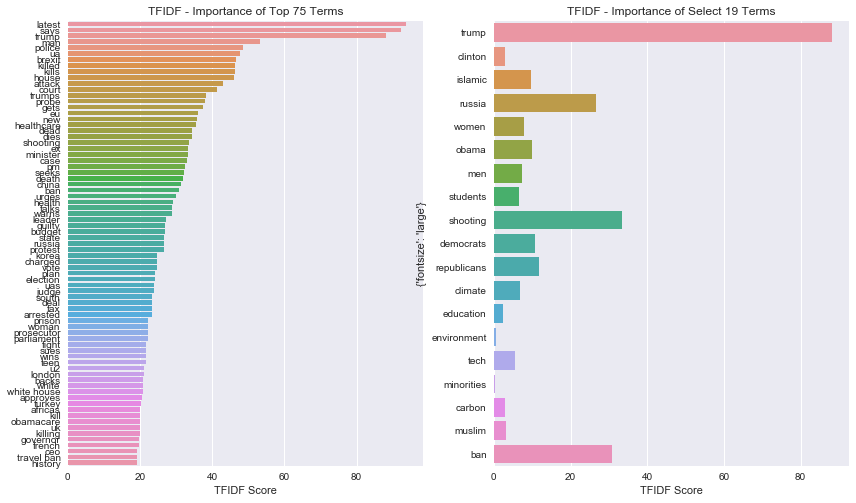

In [239]:
plot_tfidf_scores(scores, termNames, selectScores, selectTerms,  n_words = 18)